In [361]:
import numpy as np
import torch
import matplotlib.pyplot as plt

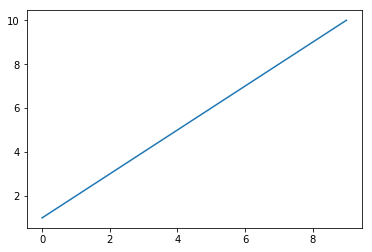

In [363]:
n_actions = 10
action_rewards = np.array(range(1, n_actions + 1))
plt.plot(action_rewards)

# Off-Policy w/ Correction

tensor([0.1818, 0.1636, 0.1455, 0.1273, 0.1091, 0.0909, 0.0727, 0.0545, 0.0364,
        0.0182])


<BarContainer object of 10 artists>

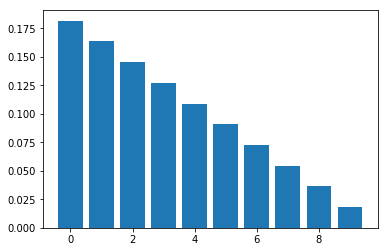

In [359]:
beta_policy = torch.as_tensor((11 - np.arange(1, n_actions+1)) / 55, dtype=torch.float)
print(beta_policy)
plt.bar(range(n_actions), beta_policy.numpy())

0 tensor(10.6566, grad_fn=<NegBackward>) tensor([0.7300, 0.1217, 0.5854, 0.3684, 0.3455, 0.6494, 0.0623, 0.1812, 0.5934,
        0.4620])
10 tensor(13.6810, grad_fn=<NegBackward>) tensor([ 0.3049, -0.0792,  0.3845,  0.2600,  0.2925,  0.7364,  0.3291,  0.4266,
         0.6883,  0.7564])
20 tensor(16.5510, grad_fn=<NegBackward>) tensor([-0.0743, -0.3085,  0.1347,  0.1044,  0.1452,  0.7477,  0.3932,  0.5021,
         0.8217,  1.6332])
30 tensor(6.8914, grad_fn=<NegBackward>) tensor([-0.3250, -0.4733, -0.0661, -0.0474, -0.0421,  0.5446,  0.3877,  0.7142,
         0.8954,  2.5116])
40 tensor(9.7185, grad_fn=<NegBackward>) tensor([-0.4864, -0.5788, -0.1943, -0.1342, -0.0714,  0.4960,  0.4831,  0.9203,
         1.0419,  2.6234])
50 tensor(7.9314, grad_fn=<NegBackward>) tensor([-0.6030, -0.6706, -0.3059, -0.2133, -0.1812,  0.4323,  0.5547,  0.8358,
         1.2639,  2.9868])
60 tensor(2.9683, grad_fn=<NegBackward>) tensor([-0.7174, -0.7719, -0.4358, -0.3558, -0.3068,  0.2663,  0.3278,  0.5796,

(0, 20)

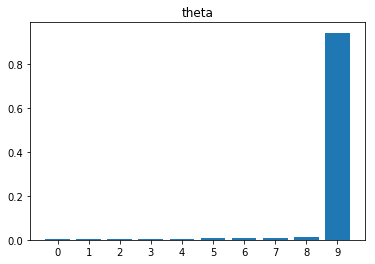

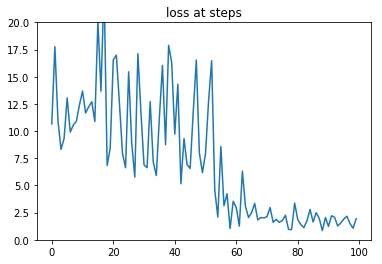

In [425]:
theta = torch.rand(n_actions, dtype=torch.float, requires_grad=True)

steps = 100
batch_size = 50
lr = 1e-1
loss_steps = []
for t in range(steps):
    actions = np.random.choice(n_actions, size=batch_size, p=beta_policy.numpy())
    rewards = torch.as_tensor(action_rewards[actions], dtype=torch.float)
    tgt_policy = torch.softmax(input=theta, dim=0)
    weight = tgt_policy.detach()[actions] / beta_policy[actions]
    weight = weight.clamp_max(1e3)
    loss = -torch.mean(weight * rewards * torch.log(tgt_policy[actions]))
    loss_steps.append(loss.item())
    if t % (steps // 10) == 0:
        print(t, loss, theta.data)
    loss.backward()
    with torch.no_grad():
        theta -= lr * theta.grad
        theta.grad.zero_()

fig = plt.figure(0)
ax = fig.add_subplot(111)
ax.bar(range(n_actions), tgt_policy.data.numpy())
ax.set_xticks(range(n_actions));
ax.set_title('theta')
fig = plt.figure(1)
ax = fig.add_subplot(111)
ax.plot(range(len(loss_steps)), loss_steps)
ax.set_title('loss at steps')
ax.set_ylim(0, 20)

# Off-Policy w/o Correction

0 tensor(9.4415, grad_fn=<NegBackward>) tensor([0.0312, 0.7499, 0.5320, 0.1030, 0.2142, 0.1449, 0.3264, 0.3751, 0.6627,
        0.0871])
10 tensor(8.1352, grad_fn=<NegBackward>) tensor([-0.1291,  0.5464,  0.5049,  0.3370,  0.3236,  0.3323,  0.4227,  0.4462,
         0.4798, -0.0372])
20 tensor(8.7310, grad_fn=<NegBackward>) tensor([-0.1374,  0.4782,  0.5157,  0.3775,  0.5063,  0.4406,  0.4429,  0.4012,
         0.3391, -0.1377])
30 tensor(9.1379, grad_fn=<NegBackward>) tensor([-0.1890,  0.4028,  0.4938,  0.4315,  0.5688,  0.4752,  0.5608,  0.4609,
         0.2258, -0.2043])
40 tensor(9.1446, grad_fn=<NegBackward>) tensor([-0.2541,  0.3132,  0.5009,  0.4722,  0.6158,  0.6230,  0.5963,  0.4073,
         0.1744, -0.2224])
50 tensor(9.5217, grad_fn=<NegBackward>) tensor([-0.2733,  0.3136,  0.4684,  0.5565,  0.6164,  0.5438,  0.6074,  0.4696,
         0.1986, -0.2745])
60 tensor(10.5216, grad_fn=<NegBackward>) tensor([-0.3264,  0.3618,  0.4111,  0.5370,  0.6836,  0.6080,  0.5328,  0.4656,
 

Text(0.5, 1.0, 'loss at steps')

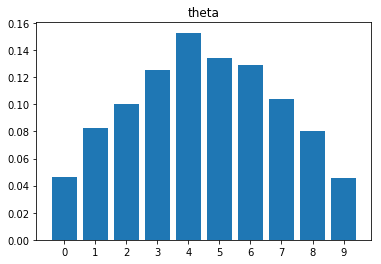

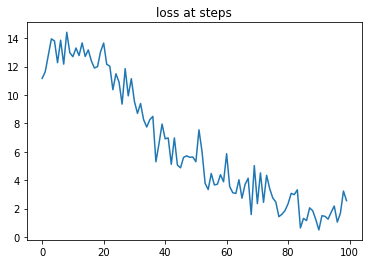

In [371]:
theta = torch.rand(n_actions, dtype=torch.float, requires_grad=True)

steps = 100
batch_size = 50
lr = 1e-1
for t in range(steps):
    actions = np.random.choice(n_actions, size=batch_size, p=beta_policy.numpy())
    rewards = torch.as_tensor(action_rewards[actions], dtype=torch.float)
    tgt_policy = torch.softmax(input=theta, dim=0)
    loss = -torch.mean(rewards * torch.log(tgt_policy[actions]))
    if t % (steps // 10) == 0:
        print(t, loss, theta.data)
    loss.backward()
    with torch.no_grad():
        theta -= lr * theta.grad
        theta.grad.zero_()

fig = plt.figure(0)
ax = fig.add_subplot(111)
ax.bar(range(n_actions), tgt_policy.data.numpy())
ax.set_xticks(range(n_actions));
ax.set_title('theta')
fig = plt.figure(1)
ax = fig.add_subplot(111)
ax.plot(range(len(loss_steps)), loss_steps)
ax.set_title('loss at steps')

# On-Policy

0 tensor(12.1577, grad_fn=<NegBackward>) tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])
10 tensor(12.9731, grad_fn=<NegBackward>) tensor([0.6057, 0.6811, 0.7114, 0.8554, 0.9645, 0.8928, 1.1812, 1.0923, 1.3442,
        1.6714])
20 tensor(11.8310, grad_fn=<NegBackward>) tensor([0.2996, 0.3647, 0.4280, 0.6154, 0.7252, 0.7485, 1.1321, 1.1645, 1.6126,
        2.9094])
30 tensor(7.5415, grad_fn=<NegBackward>) tensor([0.1113, 0.1783, 0.2608, 0.4562, 0.5974, 0.6464, 1.1316, 1.0340, 1.7589,
        3.8250])
40 tensor(2.9113, grad_fn=<NegBackward>) tensor([0.0074, 0.0726, 0.1602, 0.3923, 0.5672, 0.5421, 1.0885, 0.9545, 1.7160,
        4.4992])
50 tensor(1.8559, grad_fn=<NegBackward>) tensor([-0.0565,  0.0157,  0.0992,  0.3469,  0.5086,  0.5666,  1.0571,  0.9222,
         1.6265,  4.9136])
60 tensor(1.7590, grad_fn=<NegBackward>) tensor([-0.0997, -0.0271,  0.0677,  0.2849,  0.4554,  0.5033,  0.9854,  0.8473,
         1.5349,  5.4478])
70 tensor(1.2246, grad_fn=<NegBackward>) tensor([-0.1270, -0

Text(0.5, 1.0, 'loss at steps')

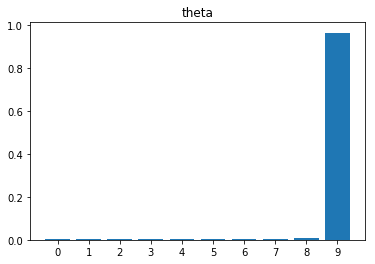

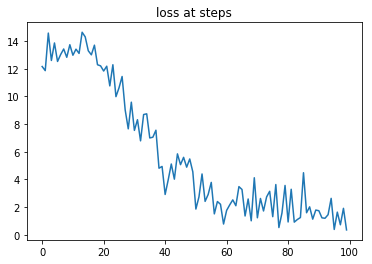

In [415]:
theta = torch.ones(n_actions, dtype=torch.float, requires_grad=True)

steps = 100
batch_size = 50
lr = 1e-1
loss_steps = []
for t in range(steps):
    tgt_policy = torch.softmax(input=theta, dim=0)
    actions = np.random.choice(n_actions, size=batch_size, p=tgt_policy.data.numpy())
    rewards = torch.as_tensor(action_rewards[actions], dtype=torch.float)
    loss = -torch.mean(rewards * torch.log(tgt_policy[actions]))
    loss_steps.append(loss.item())
    if t % (steps // 10) == 0:
        print(t, loss, theta.data)
    loss.backward()
    with torch.no_grad():
        theta -= lr * theta.grad
        theta.grad.zero_()

fig = plt.figure(0)
ax = fig.add_subplot(111)
ax.bar(range(n_actions), tgt_policy.data.numpy())
ax.set_xticks(range(n_actions));
ax.set_title('theta')
fig = plt.figure(1)
ax = fig.add_subplot(111)
ax.plot(range(len(loss_steps)), loss_steps)
ax.set_title('loss at steps')